In [1]:
include("./param.jl");
include("./aux_functions.jl");

┌ Warning: Error requiring `HDF5` from `Plots`
│   exception = (LoadError("/home/dimitrios/.julia/packages/Plots/uCh2y/src/backends/hdf5.jl", 162, UndefVarError(:HDF5Group)), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f3ee19c2843, Ptr{Nothing} @0x00007f3ee1a4f17c, Ptr{Nothing} @0x00007f3ee1a4f73b, Ptr{Nothing} @0x00007f3ee1a4f389, Ptr{Nothing} @0x00007f3ee1a4f8f0, Ptr{Nothing} @0x00007f3ee1a509c8, Ptr{Nothing} @0x00007f3ee1a51616, Base.InterpreterIP in top-level CodeInfo for Plots._hdf5_implementation at statement 4, Ptr{Nothing} @0x00007f3ee1a69e08, Ptr{Nothing} @0x00007f3ee1a6a78e, Ptr{Nothing} @0x00007f3ee1a6a13a, Ptr{Nothing} @0x00007f3ee1a6a3c8, Ptr{Nothing} @0x00007f3ee1a45105, Ptr{Nothing} @0x00007f3ee1a6b15d, Ptr{Nothing} @0x00007f3ed3d06fa1, Ptr{Nothing} @0x00007f3e9eb1cc4c, Ptr{Nothing} @0x00007f3ee1a4f75b, Ptr{Nothing} @0x00007f3ee1a4f389, Ptr{Nothing} @0x00007f3ee1a4f8f0, Ptr{Nothing} @0x00007f3ee1a509c8, Ptr{Nothing} @0x00007f3ee1a51616, Base.InterpreterI

In [2]:
using Main.aux_functions
using Main.param

In [3]:
using ADCME
using SparseArrays

using DelimitedFiles
using Dates
using Plots

In [4]:
param_model_val = param_model(N_steps=600);
tf_variables, h_t, q_t_x, q_t_y = Darcy_flow_solver(param_model_val);

In [5]:
loss,dw_2, opt_ADAM, opt_LFGS, opt_ADAM_sum, opt_LFGS_sum, diff_eval,p_pre_soft_max, p = Info_upscale(tf_variables,param_model_val,q_t_x, q_t_y,50)

2.830469177224561e-5/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dimitrios/.julia/adcme/lib/python3.7/site-pa

(PyObject <tf.Tensor 'add_72:0' shape=() dtype=float64>, PyObject <tf.Tensor 'add_73:0' shape=() dtype=float64>, PyObject <tf.Operation 'Adam' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f3deb736210>, PyObject <tf.Operation 'Adam_1' type=NoOp>, PyObject <tensorflow.contrib.opt.python.training.external_optimizer.ScipyOptimizerInterface object at 0x7f3de98dce10>, PyObject <tf.Tensor 'Max_1:0' shape=() dtype=float64>, PyObject <tf.Variable 'Variable_3:0' shape=(1, 64) dtype=float64_ref>, PyObject <tf.Tensor 'Softmax:0' shape=(1, 64) dtype=float64>)

In [6]:
sess = Session(); init(sess);


2021-05-17 18:34:53.811754: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2021-05-17 18:34:53.837725: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599990000 Hz
2021-05-17 18:34:53.838442: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5582701ffca0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-05-17 18:34:53.838457: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-05-17 18:34:53.839843: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-05-17 18:34:53.911022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-17

In [7]:
check = run(sess,q_t_x)

9-element Array{Array{Float64,3},1}:
 [6.530468928409087e-5 6.538133156159864e-5 … 6.541118747145183e-5 6.543278826819248e-5; 6.488795807482323e-5 6.483701156604528e-5 … 6.482929641968402e-5 6.483635902900436e-5; … ; 0.00013131687074923365 0.00013134578669694185 … 0.000131421308378338 0.00013150712429297533; 0.0001312541770798794 0.00013125495853088393 … 0.00013127535600439714 0.00013139847952907326]
 [6.530468928281783e-5 6.538133156044326e-5 … 6.541118747144889e-5 6.543278826796096e-5; 6.416370592882337e-5 6.411517723487193e-5 … 6.410511800216622e-5 6.411221909943545e-5; … ; 0.00013130485684436608 0.00013133381744220596 … 0.0001314093459312506 0.0001314951630369081; 0.0001312421671832181 0.00013124287945122783 … 0.00013126328768414328 0.00013138638539022583]
 [6.530468928154479e-5 6.538133155928788e-5 … 6.541118747144595e-5 6.543278826772943e-5; 6.372925156297454e-5 6.368214679040458e-5 … 6.367071636894509e-5 6.36778386991375e-5; … ; 0.00013129383295728796 0.00013132283407479964 … 0.

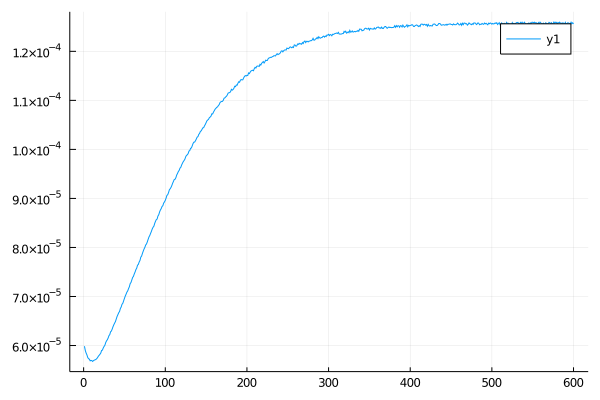

In [8]:
plot(check[5][:,4,1])

In [9]:
# aux_functions.multiply_K(sess,param_model_val,tf_variables,-2*log(10))

In [10]:
# check = run(sess,q_t_x)

In [14]:
flow_x,flow_y,loss_save = run(sess,[q_t_x,q_t_y,dw_2])

flow_x_save = flow_x[5][:,4,1]
flow_y_save = flow_y[5][:,4,1]
exp_name = "loss_function_check_"
open(string(exp_name,"flow_x.txt"),"w") do io
    writedlm(io, flow_x_save)
end

open(string(exp_name,"flow_y.txt"),"w") do io
    writedlm(io, flow_y_save)
end

open(string(exp_name,"loss.txt"),"w") do io
    writedlm(io, loss_save)
end




In [17]:



for i = 1:20

        aux_functions.multiply_K(sess,param_model_val,tf_variables,-log(1.1))
        flow_x,flow_y,loss_save = run(sess,[q_t_x,q_t_y,dw_2])

        flow_x_save = flow_x[5][:,4,1]
        flow_y_save = flow_y[5][:,4,1]

        
        
        open(string(exp_name,"flow_x.txt"),"a") do io
                writedlm(io, flow_x_save)
        end

        open(string(exp_name,"flow_y.txt"),"a") do io
                writedlm(io, flow_y_save)
        end

        open(string(exp_name,"loss.txt"),"a") do io
                writedlm(io, loss_save)
        end


end